# Import pma_open.py file

In [1]:
import sys
from pathlib import Path
import os
sys.path.append('../')
from pma_open import *


## 0. Test: does pma file open?

In [2]:
file_path = "../Dropbox Files/hel12.pma"
with open(file_path, 'rb') as file:
    data = file.read()
    

## 1. Use read_pma_f0 function
#### This function takes the pma file path and returns the first frame data

Image Size: 512 x 512


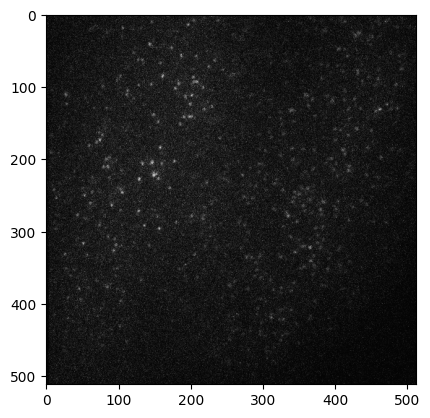

In [3]:
image_data = read_pma_f0(file_path)
plt.imshow(image_data, cmap='gray')
plt.show()


In [4]:

def read_pma_f0_3d(pma_file_path):
    try:
        with open(pma_file_path, "rb") as f:
            #Assign X_pixels and Y_pixels as the first two 16-bit integers in the file
            #<:little-endian (least significant byte first), HH:two 16-bit integers
            X_pixels, Y_pixels = struct.unpack("<HH", f.read(4))
            print(f"Image Size: {X_pixels} x {Y_pixels}")
            
            #Calc number of frames
            f.seek(0, 2) #sets pointer to end of file .seek(offset, from_what)
            filesize = f.tell() #returns current (end) position of pointer
            Nframes = (filesize - 4) // (X_pixels * Y_pixels)  #Assuming 4-byte header
            f.seek(0, 4) #Reset file pointer to immediately after 4 byte header

            #Read the binary image data
            frame_data0 = f.read(X_pixels * Y_pixels)

            image_data = np.frombuffer(frame_data0, dtype=np.uint8).reshape((Y_pixels, X_pixels))
            image_data_rgb = np.stack((image_data,) * 3, axis=-1)

            return image_data

    except Exception as e:
        print(f"Error reading .pma file: {e}")
        return None

Image Size: 512 x 512


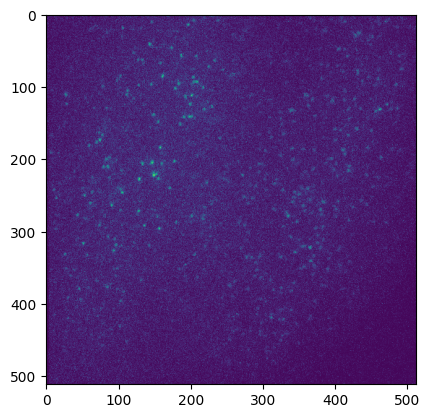

Frame 0 data dimensions: (512, 512)


In [5]:
image_data_3d = read_pma_f0_3d(file_path)
plt.imshow(image_data_3d)
plt.show()

print(f"Frame 0 data dimensions: {image_data_3d.shape}")

#### Checking the image data dtype, dimensions, element dtype, first row and maximum element value of the first frame data

In [7]:
print(f"Frame 0 data object type: {type(image_data)}")
print(f"Frame 0 data dimensions: {image_data.shape}")
print(f"Element type: {image_data.dtype}")
print(f"Frame 0, row 0\n{image_data[0,:]}") #prints first row
print(f"Frame 0 max element value: {image_data.max()}") #prints max value within 1st image

Frame 0 data object type: <class 'numpy.ndarray'>
Frame 0 data dimensions: (512, 512)
Element type: uint8
Frame 0, row 0
[ 0  2  0  2  2  6  3 12 11  8  3  2  2  6 15  3 14 21  3  2  8  3  2  5
  6  8  8  3 12 12  3 11  3 14  7 18  7  2  3 11 17 12  2  4 27  4 13 17
  6 30  4  4  5  9 15  9 12 12  3  5  8 12  2  6 16  2  2  2  4  7  7  7
 20  2  2  6 19  6  6  6 10  2  6 10  7 14  5 15  9  4 12 13  9  5  5 17
  5  6 10 15  6  6  8  7 11  7 11 16 18  7 14  6 23 10 17  9  9  8  5 16
 29 15  6  8  7 26  4  8 11  8 17 16 10 10  7  3 12 15  3  8  3 10 13  9
  8 15 11 14  4 19  9 19 12  6 19 14 10 16 11  8 12  9 12  6  8  8  5 16
  8  4  6 10 11  7 10  8 12 14 13 20 17  9  3 28  9  8 17  5 17 10 10  8
 10 15 19 10  7  7  8 17  4  6 16 12 10  7 13 17  6 13 13  5  4 15 17 15
 25  6  2 15 14 16 16 15 21 11  7 17 11 14 37 33 13 19 22 14  5 27 17 19
  5 10 15  7 14 14 17 13 18  9 11  4 11  7 11  3 10 17  9 14 10 12 10  7
  3 12  8 17 11  2  6  9 12 10  6 13 23  5 13  9  7 16  7  7 11  4 13 19
  8

## 2. Use read_pma function
#### This function take the pma file path and returns the frames data. 
#### Below the final frame is shown
#### Additionally, printed is the frames data type, the number of frames, and the final frame data array

Image Size: 512 x 512


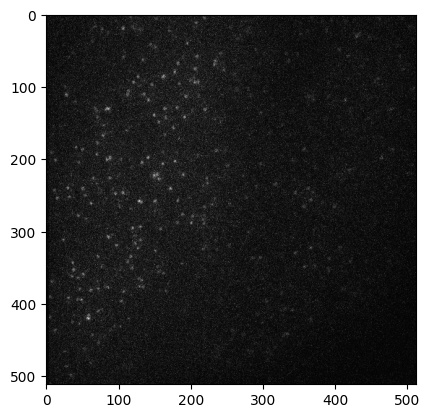

Frames data object type: <class 'list'>
Number of frames: 250
Final frame data array: [[ 3  2  3 ...  5 12  2]
 [ 5  5 11 ...  6  3  3]
 [13  4 13 ...  4  4  4]
 ...
 [ 4  3  3 ...  5  7  5]
 [ 2  2  2 ...  2  8  2]
 [ 7  2  4 ...  4  2  4]]


In [8]:
Frames_data = read_pma(file_path)
# plt.imshow(Frames_data[0], cmap='gray')
plt.imshow(Frames_data[-1], cmap='gray')
plt.show()

print(f"Frames data object type: {type(Frames_data)}")
print(f"Number of frames: {len(Frames_data)}")
print(f"Final frame data array: {Frames_data[-1]}")

In [9]:
def read_pma_3d(pma_file_path):
    try:
        with open(pma_file_path, "rb") as f:
            #Assign X_pixels and Y_pixels as the first two 16-bit integers in the file
            #<:little-endian (least significant byte first), HH:two 16-bit integers
            X_pixels, Y_pixels = struct.unpack("<HH", f.read(4))
            print(f"Image Size: {X_pixels} x {Y_pixels}")
            
            #Calc number of frames
            f.seek(0, 2) #sets pointer to end of file .seek(offset, from_what)
            filesize = f.tell() #returns current (end) position of pointer
            Nframes = (filesize - 4) // (X_pixels * Y_pixels)  #Assuming 4-byte header
            f.seek(0, 4) #Reset file pointer to immediately after 4 byte header

            for frame_idx in range(Nframes):
                #Read the binary image data
                frame_data = f.read(X_pixels * Y_pixels)

            #Return a list of 3D numpy arrays, each representing a frame
            return [np.frombuffer(f.read(X_pixels * Y_pixels), dtype=np.uint8).reshape((Y_pixels, X_pixels)) for frame_idx in range(Nframes)]

    except Exception as e:
        print(f"Error reading .pma file: {e}")
        return None

Image Size: 512 x 512


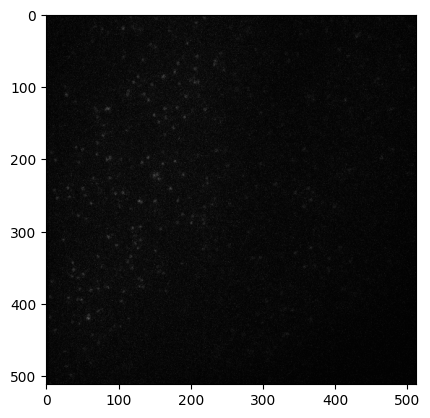

Frames data object type: <class 'numpy.ndarray'>
Number of frames: 512
Final frame data array: [[7 7 7]
 [2 2 2]
 [4 4 4]
 ...
 [4 4 4]
 [2 2 2]
 [4 4 4]]


In [11]:
Frames_data_3d = read_pma_3d(file_path)
plt.imshow(Frames_data_3d)
plt.show()

print(f"Frames data object type: {type(Frames_data_3d)}")
print(f"Number of frames: {len(Frames_data_3d)}")
print(f"Final frame data array: {Frames_data_3d[-1]}")

## 3. Generate Images in specified file
#### Takes the pma file path and saves the frame images as indexed .png files in a folder called {pma_file_name}_images
#### This images will then be used (in order)

In [6]:
# generate_images(file_path)

## 4. Generate mp4
#### Takes the images folder and returns an mp4 video called {pma_file_name}.mp4

In [7]:
generate_mp4('hel12_Files', 100)

Directory already exists: hel12_Files/hel12_Video


In [8]:
generate_images('../Dropbox Files/hel1.pma')

Directory already exists: hel1_Files


In [9]:
# generate_mp4('hel1_Files', 100)

In [13]:
# generate_images('../Dropbox Files/hel2.pma')

Image Size: 512 x 512


In [14]:
# generate_mp4('hel2_Files', 100)

Video sucessfully generated and saved as: hel2.mp4
Images: ['hel2frame_0.png', 'hel2frame_1.png', 'hel2frame_2.png', 'hel2frame_3.png', 'hel2frame_4.png', 'hel2frame_5.png', 'hel2frame_6.png', 'hel2frame_7.png', 'hel2frame_8.png', 'hel2frame_9.png', 'hel2frame_10.png', 'hel2frame_11.png', 'hel2frame_12.png', 'hel2frame_13.png', 'hel2frame_14.png', 'hel2frame_15.png', 'hel2frame_16.png', 'hel2frame_17.png', 'hel2frame_18.png', 'hel2frame_19.png', 'hel2frame_20.png', 'hel2frame_21.png', 'hel2frame_22.png', 'hel2frame_23.png', 'hel2frame_24.png', 'hel2frame_25.png', 'hel2frame_26.png', 'hel2frame_27.png', 'hel2frame_28.png', 'hel2frame_29.png', 'hel2frame_30.png', 'hel2frame_31.png', 'hel2frame_32.png', 'hel2frame_33.png', 'hel2frame_34.png', 'hel2frame_35.png', 'hel2frame_36.png', 'hel2frame_37.png', 'hel2frame_38.png', 'hel2frame_39.png', 'hel2frame_40.png', 'hel2frame_41.png', 'hel2frame_42.png', 'hel2frame_43.png', 'hel2frame_44.png', 'hel2frame_45.png', 'hel2frame_46.png', 'hel2frame